# SOMENTE O ITEM 1 É OBRIGATÓRIO PARA APRESENTAÇÃO!

# História das Olimpíadas - Parte 2
_(créditos ao prof. Rafael Moreira)_

Você recentemente trabalhou (ou está trabalhando) em uma análise de dados históricos dos jogos olímpicos utilizando o Pandas para auxiliá-lo.

Desde que você iniciou seus trabalhos nesse projeto, novas ferramentas bastante poderosas foram ensinadas! O seu papel agora será utilizar essas novas ferramentas para gerar algumas visualizações que tornarão certas informações muito mais claras.

Utilize qualquer uma das bibliotecas estudadas (```matplotlib```, ```seaborn``` e ```plotly```) para realizar as atividades propostas. Não há problema em usar apenas uma para realizar todas as atividades, nem em utilizar cada uma delas em uma atividade diferente - siga suas preferências pessoais!

Utilize os (muitos) parâmetros permitidos por cada função e/ou atributos dos objetos fornecidos pelas bibliotecas para criar uma identidade visual coesa para ser utilizada em todo o projeto. Use títulos, legendas e rótulos nos eixos para deixar os gráficos verdadeiramente informativos. E não se esqueça que a simples escolha das cores a serem utilizadas pode tornar os gráficos ainda mais interessantes!

Você utilizará o mesmo dataset fornecido no projeto anterior. Não há problemas em reaproveitar códigos do projeto anterior para economizar tempo e focar seus esforços na geração dos gráficos.

Para começar, importe o Pandas e carregue o arquivo ```athlete_events.csv``` fornecido no projeto anterior.

In [1]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('../data/athlete_events.csv')
df.head(10)

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   
5   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   
6   5  Christine Jacoba Aaftink   F  25.0   185.0    82.0     Netherlands   
7   5  Christine Jacoba Aaftink   F  25.0   185.0    82.0     Netherlands   
8   5  Christine Jacoba Aaftink   F  27.0   185.0    82.0     Netherlands   
9   5  Christine Jacoba Aaftink   F  27.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season         City          Sport  \
0  CHN  1992 Summer  1992  Summer    Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer       London           Judo   
2  DEN  1920 Summer  1920  Summer    Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer        Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter      Calgary  Speed Skating   
5  NED  1988 Winter  1988  Winter      Calgary  Speed Skating   
6  NED  1992 Winter  1992  Winter  Albertville  Speed Skating   
7  NED  1992 Winter  1992  Winter  Albertville  Speed Skating   
8  NED  1994 Winter  1994  Winter  Lillehammer  Speed Skating   
9  NED  1994 Winter  1994  Winter  Lillehammer  Speed Skating   

                                Event Medal  
0         Basketball Men's Basketball   NaN  
1        Judo Men's Extra-Lightweight   NaN  
2             Football Men's Football   NaN  
3         Tug-Of-War Men's Tug-Of-War  Gold  
4    Speed Skating Women's 500 metres   NaN  
5  Speed Skating Women's 1,000 metres   NaN  
6    Speed Skating Women's 500 metres   NaN  
7  Speed Skating Women's 1,000 metres   NaN  
8    Speed Skating Women's 500 metres   NaN  
9  Speed Skating Women's 1,000 metres   NaN

*Vamos remover os competidores com o time desconhecido para que o ranking dos países seja mais preciso 
e substituir os espaços vazios na coluna de medalhas para que seja mais fácil trabalhar com esses dados.*

*Além disso, vamos eliminar a coluna 'Games' pois a informação contida nela já se encontra nas colunas 'Year' e 'Season'*

In [3]:
df = df[df['Team'] != 'Unknown']

df['Medal'].fillna('No medal', inplace= True)

df.drop(columns='Games',inplace=True)

*Vamos padronizar o nome dos países para analisarmos, por exemplo, 'Brasil' e 'Brasil-2' como apenas um país.*

In [4]:
import re
def padroniza_pais(pais):
  return re.sub(r'(^[a-zA-Z0-9_ ]*)([-,/])([a-zA-Z0-9_ ]*$)', r"\1", pais)

df['Team'] = df['Team'].apply(padroniza_pais)

*Nos primeiros jogos, principalmente, haviam equipes representando clubes, associações, universidades, etc.*

*Assim, como todos estão associados a um 'NOC', escolhemos, para cada NOC, a equipe com mais registros.*

In [5]:
repr_noc = df.groupby(['NOC', 'Team']).size().sort_values(ascending=False).reset_index()

repr_noc = repr_noc[['NOC', 'Team']].drop_duplicates(['NOC']).to_dict()

# cria o dicionario que será usado no map
repr_noc = {repr_noc['NOC'][i]: repr_noc['Team'][i] for i in repr_noc['NOC']}

*Atualizamos a coluna 'Team' com o representante 'padrao' do 'NOC' correpondente*

In [6]:
df['Team'] = df['NOC'].map(repr_noc)

## 1. O Brasil nas Olimpíadas

Vamos começar filtrando novamente os dados que iremos trabalhar. Crie um DataFrame contendo apenas informações sobre atletas **medalhistas** brasileiros.

In [7]:
df_br = df[df['Team'] == 'Brazil'].copy()

df_medalhistas_br = df_br[df_br['Medal'] != 'No medal']

df_evento_br = df_br.drop_duplicates(subset=['Event','Year','Medal'])

df_medalhas_por_evento_br = df_evento_br[df_evento_br['Medal'] != 'No medal']

Vamos caracterizar fisicamente nossos medalhistas, verificando se há alguma correlação entre o desempenho em certos esportes e o tipo físico dos atletas. 

Gere um gráfico de barras contendo os diferentes esportes no eixo X e a altura dos atletas no eixo Y. Utilize barras lado-a-lado para separar atletas do sexo masculino e feminino.

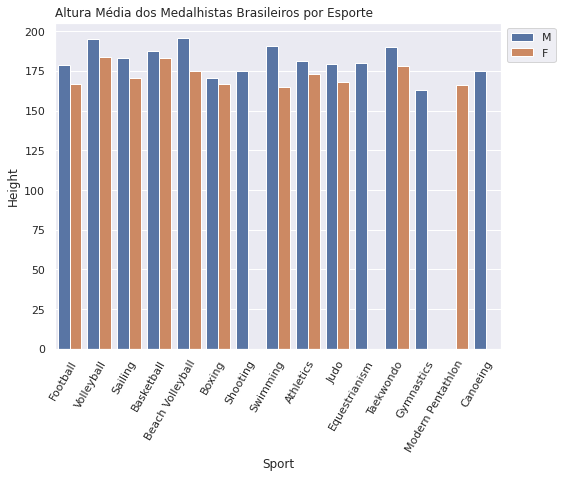

In [8]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_medalhistas_br, x='Sport', y='Height', hue='Sex', ci=None)

plt.xticks(rotation=60, rotation_mode='anchor', ha='right')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Altura Média dos Medalhistas Brasileiros por Esporte', loc='left')

plt.show()

Agora gere um gráfico semelhante ilustrando o peso dos atletas.

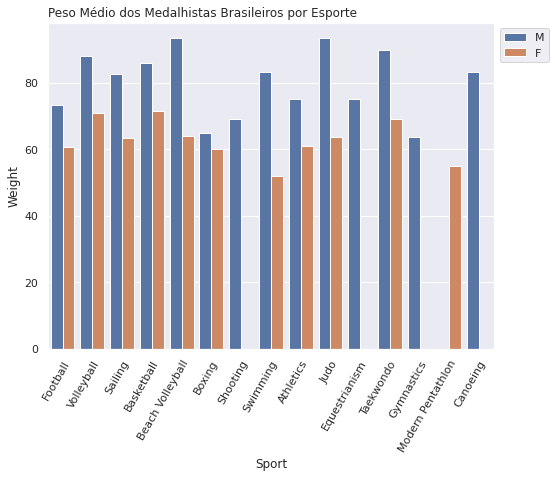

In [9]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_medalhistas_br, x='Sport', y='Weight', hue='Sex', ci=None)

plt.xticks(rotation=60, rotation_mode='anchor', ha='right')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Peso Médio dos Medalhistas Brasileiros por Esporte', loc='left')

plt.show()

In [10]:
medalhas_por_atleta_br = df_medalhistas_br.groupby('Name')['Medal'].count()

maximo = medalhas_por_atleta_br.max()

brasileiros_mais_medalhas = medalhas_por_atleta_br[medalhas_por_atleta_br == maximo]

*As funções a seguir criam tipos de dataframes que usaremos para exibir os gráficos das medalhas*

In [11]:
def padroniza_df_unstack(df):
    '''
    Recebe um dataframe contendo as colunas 'Gold', 'Silver' e 'Bronze' e adciona ao dataframe
    outras duas contendo somas, linha a linha, de tais colunas.
    
    args:
        df: pandas.Dataframe
    '''
    df.fillna(0,inplace= True)
    df['Total Medalhas'] = df[['Silver', 'Bronze', 'Gold']].sum(axis=1)
    df['Silver + Bronze'] = df[['Silver','Bronze']].sum(axis=1) 

def cria_dfs_para_graficos(series, name='Qtde'):
    '''
    Recebe uma series com um dos níveis do índice contendo 'Gold', 'Silver' e 'Bronze' e 
    cria dois dataframes: o primeiro com colunas específicas para cada tipo de medalha e 
    o segundo apenas sendo a series transformada em dataframe.
    
    args:
        series: pandas.Series
        name: srt (Opcional)
        
    returns:
        tupla de dois dataframes
    '''
    df_unstack = series.unstack(fill_value=0).reset_index()
    df_medalhas = series.reset_index(name = name)
    padroniza_df_unstack(df_unstack)
    return df_unstack, df_medalhas

*Cores das medalhas que iremos usar ao longo do notebook.*

In [12]:
cores = {
    'Gold': 'gold',
    'Silver': 'grey',
    'Bronze': 'darkgoldenrod',
    }

*A função a seguir automatiza a elaboração do gráfico de barras empilhadas*

In [13]:
def plot_medalhas_empilhadas(df, eixo_x = 'Name', 
                             ylabel='Total Medalhas', 
                             xlabel=None, 
                             title = None, 
                             orient='v', 
                             figsize=(8,5), 
                             rotation=0, 
                             label=False, 
                             top=False):
    
    fig, ax = plt.subplots(figsize=figsize)
    
    medalhas = {
    'Gold': {'coluna':'Total Medalhas','cor':'gold'},
    'Silver': {'coluna':'Silver + Bronze','cor':'grey'},
    'Bronze': {'coluna':'Bronze','cor':'darkgoldenrod'},
    }
    
    x_aux = eixo_x
    for k,v in medalhas.items():
        eixo_y = v['coluna']
        if orient == 'h':
            eixo_x, eixo_y = eixo_y, x_aux
        sns.barplot(data=df, x=eixo_x ,y = eixo_y, color=v['cor'], label=k , orient=orient)
        if label:
            plt.bar_label(ax.containers[-1],labels=df[k])

    ax.tick_params(labeltop=top)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.xticks(rotation = rotation)
    plt.tight_layout()
    plt.show()

*Como ficamos em dúvida em relação à visualização do gráfico de barras empilhadas, resolvemos gerar dois gráficos distintos para cada situação: um de barras empilhadas como pedido no enunciado e o outro com as barras lado a lado*

*A função abaixo automatiza a elaboração do gráfico do segundo caso.*

In [14]:
def plot_medalhas(df, title, x, y='Qtde', figsize=(8,5), rotation=0, 
                  xlabel=None, line=True, xgrid=False
                 ):
    
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.barplot(data=df, x=x, y=y, hue='Medal', hue_order=cores.keys(), palette=cores)
    if line:
        total = df.groupby(x).sum()
        sns.lineplot(data=total, x=total.index, y=y, linestyle='--', 
                     marker='o', color='silver', label='Total Medalhas'
                    )
    if xgrid:
        ax.grid(axis="x", color="green", alpha=.1, linewidth=1, linestyle=":")
    plt.legend(bbox_to_anchor=(1, 1))
    ax.tick_params(bottom=True)
    if rotation:
        plt.xticks(rotation = rotation, ha='left', rotation_mode='anchor')
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

Vamos analisar agora as medalhas que nossos atletas trouxeram para casa.

Encontre os maiores medalhistas brasileiros em **total de medalhas**. Em seguida, faça um gráfico de barras empilhadas. No eixo X coloque o nome dos atletas, e no eixo Y coloque o número de medalhas. Utilize as barras empilhadas para mostrar, respectivamente, as medalhas de bronze, prata e ouro de cada atleta.

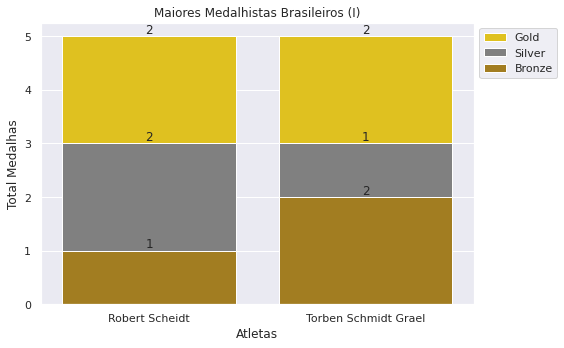

In [15]:
se_brasileiros_mais_medalhas = df_medalhistas_br[df_medalhistas_br['Name'].isin(brasileiros_mais_medalhas.index.to_list())].groupby(['Name', 'Medal']).size()

df_brasileiros_mais_medalhas_unstack, df_brasileiros_mais_medalhas = cria_dfs_para_graficos(se_brasileiros_mais_medalhas)

plot_medalhas_empilhadas(df_brasileiros_mais_medalhas_unstack, 
                         xlabel='Atletas', 
                         title='Maiores Medalhistas Brasileiros (I)',
                         label=True)

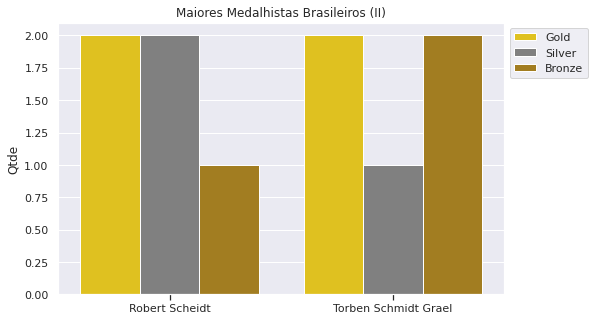

In [16]:
plot_medalhas(df_brasileiros_mais_medalhas, 
              title='Maiores Medalhistas Brasileiros (II)', 
              x='Name', 
              line=False)

Agora gere o mesmo gráfico de barras empilhadas substituindo os nomes dos atletas pelo nome de todos os esportes onde o Brasil já ganhou medalhas.

**DICA:** tome muito cuidado nessa análise: cada **evento esportivo** rende 1 medalha. Por exemplo, quando a equipe de futebol vence, isso é considerado 1 medalha, mesmo tendo cerca de 20 atletas medalhistas na equipe. 

In [17]:
se_medalhas_por_esporte_br = df_medalhas_por_evento_br.groupby(['Sport','Medal']).size()

df_medalhas_esporte_unstack, df_medalhas_esporte = cria_dfs_para_graficos(se_medalhas_por_esporte_br)

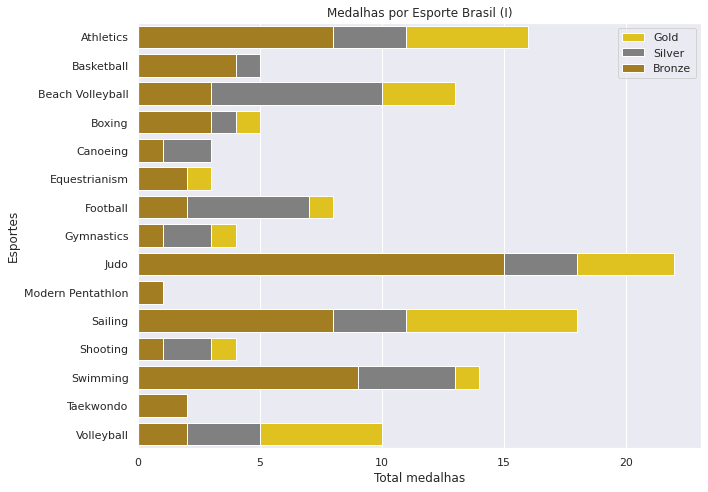

In [18]:
plot_medalhas_empilhadas(df_medalhas_esporte_unstack, 
                         eixo_x='Sport', 
                         figsize=(10,7), 
                         orient = 'h', 
                         title='Medalhas por Esporte Brasil (I)',
                         ylabel='Esportes',
                         xlabel='Total medalhas')

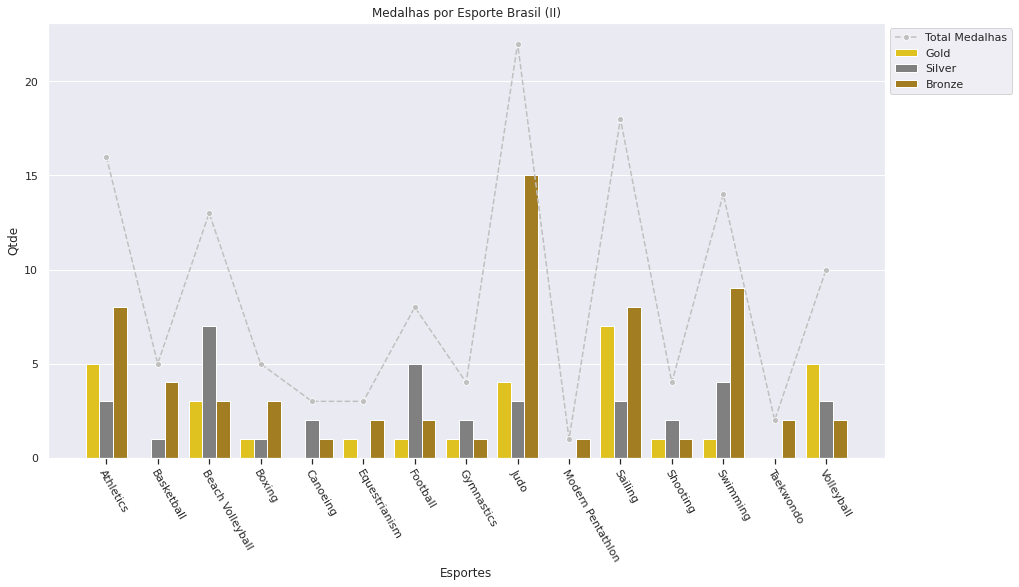

In [19]:
plot_medalhas(df_medalhas_esporte, 
              title='Medalhas por Esporte Brasil (II)', 
              x='Sport', 
              figsize=(15, 8),
              rotation=-60, 
              xlabel='Esportes')

Mais um gráfico de barras empilhadas: agora mostre os **eventos esportivos** que renderam medalhas para o Brasil.

Lembrando: cada "categoria" dentro de um esporte é considerado um evento. Por exemplo, dentro de "atletismo", temos uma competição de 100m masculina, uma de 100m feminino, um revezamento 4 x 100m masculino, um revezamento 4 x 100m feminino, uma competição de 400m masculino, uma de 400m feminino, uma maratona masculina, uma maratona feminina, e assim sucessivamente.

In [20]:
se_medalhas_por_evento_br = df_medalhas_por_evento_br.groupby(['Event','Medal']).size()

df_medalhas_evento_unstack, df_medalhas_evento = cria_dfs_para_graficos(se_medalhas_por_evento_br)

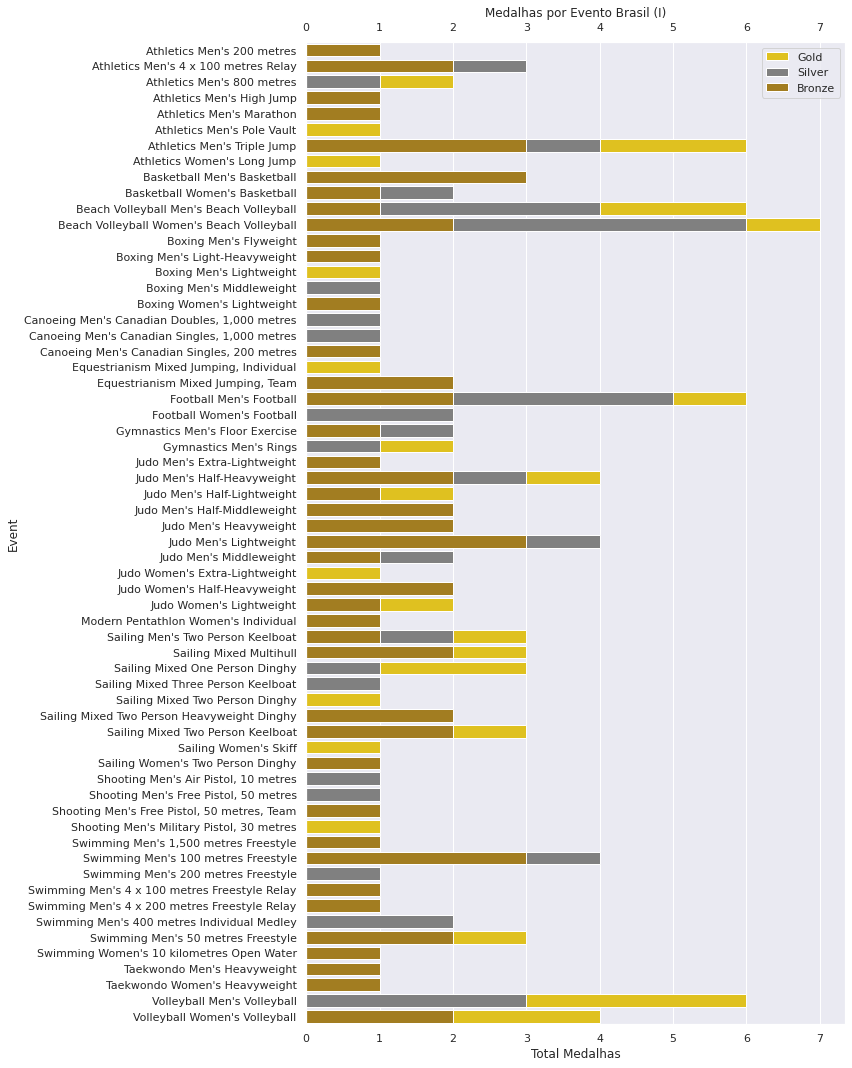

In [21]:
plot_medalhas_empilhadas(df_medalhas_evento_unstack, 
                         eixo_x='Event',
                         figsize=(12,15), 
                         title='Medalhas por Evento Brasil (I)',
                         xlabel='Total Medalhas',
                         ylabel='Event',
                         orient='h',
                         top= True)

*Como há muitos eventos distintos medalhados pelo Brasil, a visualização do gráfico acima fica um pouco prejudicada*

*Dessa forma, os próximos dois gráficos mostram apenas os eventos com um total de medalhas maior do que 3.*

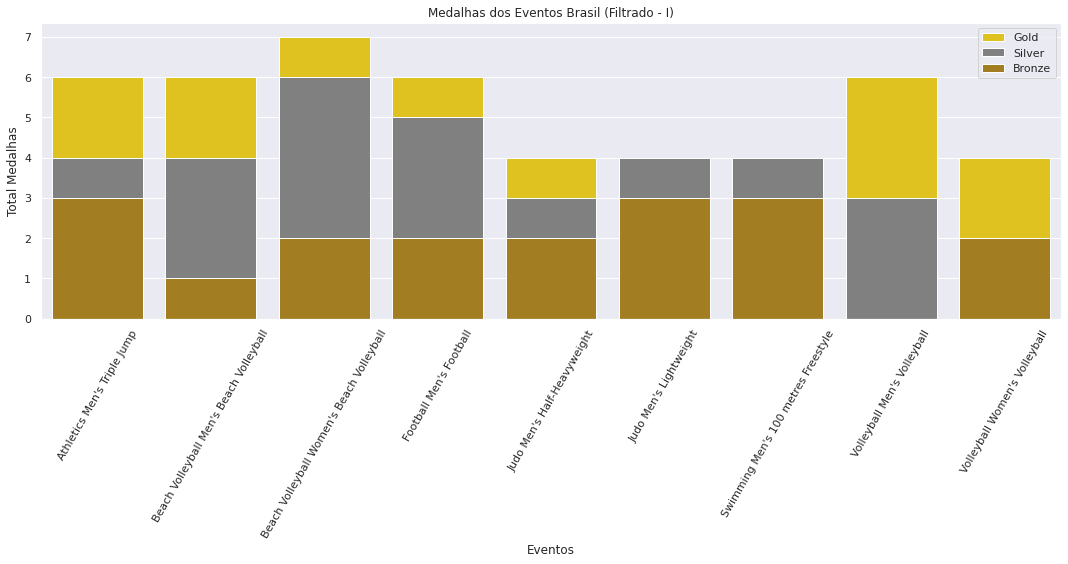

In [22]:
n = 3
df_medalhas_evento_3 = df_medalhas_evento_unstack[df_medalhas_evento_unstack['Total Medalhas'] > n]

plot_medalhas_empilhadas(df_medalhas_evento_3, 
              title='Medalhas dos Eventos Brasil (Filtrado - I)', 
              eixo_x='Event', 
              figsize=(15, 8),
              rotation=60, 
              xlabel='Eventos')

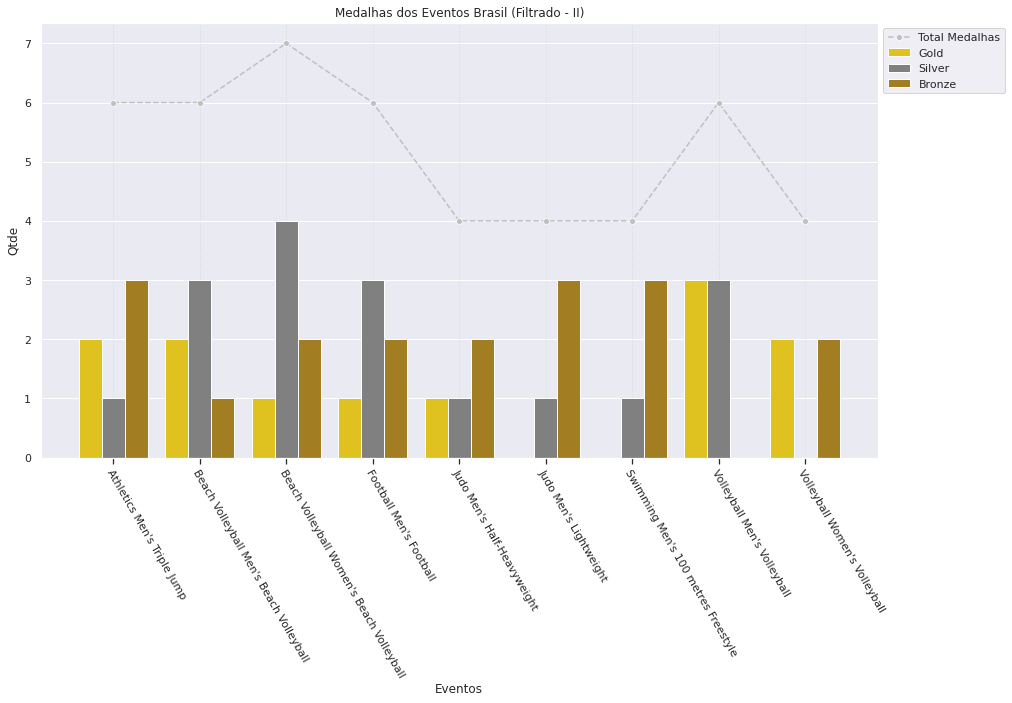

In [23]:
df_medalhas_evento['Total'] = df_medalhas_evento.groupby('Event')['Qtde'].transform(lambda x: sum(x))

df_medalhas_evento_n = df_medalhas_evento[df_medalhas_evento['Total'] > n]
plot_medalhas(df_medalhas_evento_n, 
              title='Medalhas dos Eventos Brasil (Filtrado - II)', 
              x='Event', 
              figsize=(15, 8),
              rotation=-60, 
              xlabel='Eventos',
              xgrid=True)


Utilize um gráfico de distribuição (como um histograma, por exemplo) ilustrando a quantidade total de medalhas do Brasil por esporte.

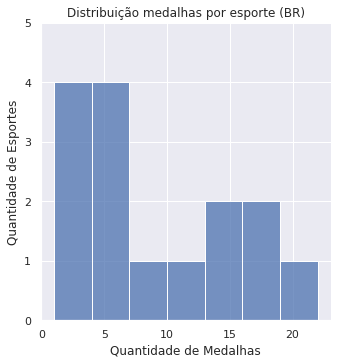

In [24]:
sns.displot(data=df_medalhas_esporte_unstack,x = "Total Medalhas", bins=7)
plt.title('Distribuição medalhas por esporte (BR)')
plt.ylabel('Quantidade de Esportes')
plt.xlabel('Quantidade de Medalhas')
plt.yticks(range(6))
plt.show()

Repita o procedimento acima, mas com medalhas de ouro.

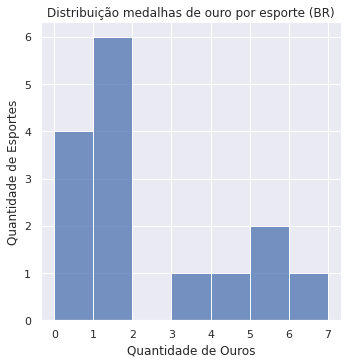

In [25]:
sns.displot(data=df_medalhas_esporte_unstack,x = "Gold",bins=7)
plt.title('Distribuição medalhas de ouro por esporte (BR)')
plt.ylabel('Quantidade de Esportes')
plt.xlabel('Quantidade de Ouros')
plt.xticks()
plt.show()

Agora faça um gráfico de setores (pizza) mostrando a distribuição de medalhas de ouro do Brasil por esporte.

In [26]:
total_ouros_esporte=df_medalhas_esporte[df_medalhas_esporte['Medal'] == 'Gold']
px.pie(total_ouros_esporte, values='Qtde', names='Sport', title='Distribuição medalhas de ouro por esporte (BR)')

Para finalizar a história do Brasil, vamos ver a série temporal de medalhas brasileiras. Crie um gráfico de linhas contendo 3 linhas: ouro, prata e bronze. Coloque no eixo X a edição da olimpíada (em ordem cronológica) e no eixo Y o total de medalhas de cada tipo.

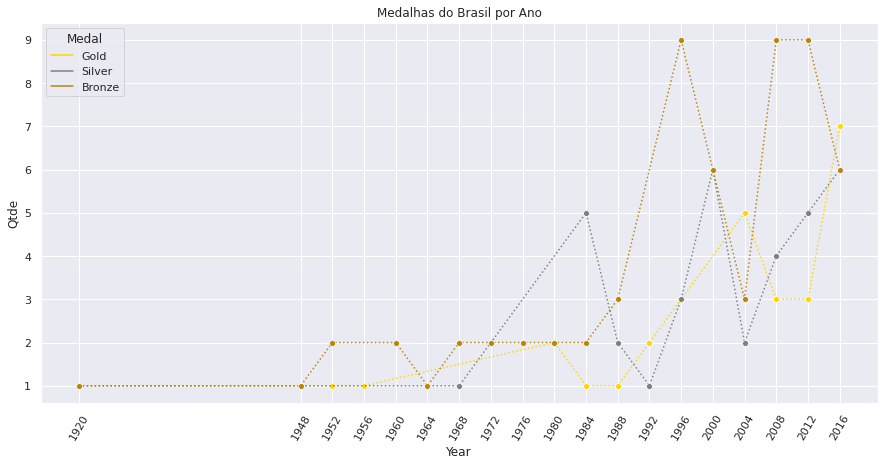

In [27]:
df_medalhas_ano = df_medalhas_por_evento_br.groupby(['Year', 'Medal']).size().reset_index(name='Qtde')

plt.figure(figsize=(15,7))

sns.lineplot(data = df_medalhas_ano , x = 'Year', y = 'Qtde', hue = 'Medal', 
             ls=':',marker='o',hue_order=cores.keys(), palette=cores);

plt.xticks(df_medalhas_ano['Year'].unique(),rotation=60)

plt.title('Medalhas do Brasil por Ano');

## 2. O mundo nos jogos de verão

Filtre o DataFrame original para conter apenas informações sobre os **medalhistas** de todos os países **nos jogos de verão**.



In [28]:
df_medalhistas_verao = df[(df['Medal'] != 'No medal') & (df['Season'] == 'Summer') ]

Utilizando subplots, crie 2 boxplots ilustrando a quantidade de medalhas por atleta. Em um deles, considere todos os atletas. No segundo, experimente remover os *outliers*.

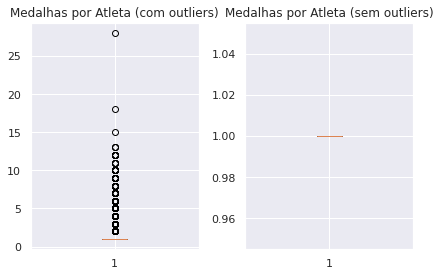

In [29]:
fig,(ax1,ax2) = plt.subplots(1,2)
qntd_medalhas = df_medalhistas_verao.groupby('Name')['Medal'].size().values
ax1.boxplot(qntd_medalhas)
ax1.set_title('Medalhas por Atleta (com outliers)')
ax2.boxplot(qntd_medalhas,showfliers=False)
ax2.set_title('Medalhas por Atleta (sem outliers)')
fig.tight_layout()
plt.show()

##### Percebe-se que a grande maioria dos medalhistas ganhou apenas uma medalha, por isso o boxplot ficou dessa maneira. Usando de uma linguagem matemática, isso aconteceu pois o Q1 é igual ao Q3.

Descubra o total de medalhas de ouro de cada país (lembrando-se da restrição dos eventos esportivos, para não contabilizar múltiplas medalhas em esportes de equipe!).

Agora pegue os 10 países com mais medalhas e crie uma categoria "Outros" para o restante dos países. Exiba um gráfico de pizza mostrando a distribuição de medalhas de ouro entre essas 11 "equipes".

In [30]:
df_ouros_verao = df_medalhistas_verao[df_medalhistas_verao['Medal'] == 'Gold'].drop_duplicates(subset=['Event','Year','Medal'])
df_ouros_por_pais = df_ouros_verao.groupby('Team').size().reset_index(name='Gold').sort_values('Gold',ascending=False)
df_top10_ouros = df_ouros_por_pais.head(10)
df_restante_ouros = df_ouros_por_pais.drop(df_top10_ouros.index)
df_11_ouros = df_top10_ouros.append(pd.DataFrame([[df_restante_ouros['Gold'].sum(),'Outros']],columns=['Gold','Team']))

pull = [0 for _ in range(10)] + [0.05]

fig = go.Figure(data=[go.Pie(labels=df_11_ouros['Team'], 
                             values=df_11_ouros['Gold'], 
                             pull=pull)])

fig.update_layout(title_text='Medalhas de Ouro por País')
fig.show()

Repita o procedimento acima, mas mostrando o total de medalhas ao invés de apenas medalhas de ouro.

In [31]:
df_medalhas_verao = df_medalhistas_verao.drop_duplicates(subset=['Event','Year','Medal'])
df_medalhas_por_pais = df_medalhas_verao.groupby('Team').size().reset_index(name='Total Medalhas').sort_values('Total Medalhas',ascending=False)
df_top10_medalhas = df_medalhas_por_pais.head(10)
df_restante_medalhas = df_medalhas_por_pais.drop(df_top10_medalhas.index)
df_11_medalhas = df_top10_medalhas.append(pd.DataFrame([[df_restante_medalhas['Total Medalhas'].sum(),'Outros']],columns=['Total Medalhas','Team']))

fig = go.Figure(data=[go.Pie(labels=df_11_medalhas['Team'], 
                             values=df_11_medalhas['Total Medalhas'], 
                             pull=pull)])
fig.update_layout(title_text='Total Medalhas por País')
fig.show()

Crie um gráfico de barras empilhadas, com cada país das categorias acima no eixo X, total de medalhas no eixo Y, e barras empilhadas representando as medalhas de ouro, prata e bronze de cada país.

In [32]:
se_medalhas_por_pais = df_medalhas_verao.groupby(['Team','Medal']).size()
df_medalhas_pais_unstack, df_medalhas_pais = cria_dfs_para_graficos(se_medalhas_por_pais)
df_top10 = df_medalhas_pais[df_medalhas_pais['Team'].isin(df_top10_medalhas['Team'])]
df_outros = df_medalhas_pais.drop(df_top10.index)
df_outros_medalhas = df_outros.groupby(['Medal']).sum()
df_outros_medalhas['Team'] = 'Outros'
df_outros_medalhas['Medal'] = df_outros_medalhas.index
df_top10_e_outros = pd.concat([df_top10,df_outros_medalhas])

medalhas = {'Gold':3,
           'Silver':2,
            'Bronze':1}
df_top10_e_outros['Valor'] = df_top10_e_outros['Medal'].map(medalhas)
df_top10_e_outros.sort_values('Valor',inplace=True)

fig = px.bar(df_top10_e_outros, y="Team", x="Qtde", color="Medal", title="Medalhas por país",orientation='h',color_discrete_map=cores,)
fig.show()




Crie um gráfico de distribuição (por exemplo, um histograma) mostrando a quantidade total de medalhas por país.

**Desafio bônus:** Crie uma visualização da quantidade de medalhas de ouro e outra para quantidade total de medalhas por país, ambas utilizando mapas. Utilize o tipo de mapa que achar mais adequado.

## 3. Brasil vs Mundo

Faça um gráfico de barras comparando os maiores medalhistas brasileiros com os maiores medalhistas do mundo em suas respectivas categorias.

Represente o esporte no eixo X, a quantidade de medalhas no eixo Y, coloque barras lado-a-lado representando os diferentes atletas de uma mesma modalidade e empilhe as medalhas de ouro, prata e bronze de cada atleta.

Repita o procedimento acima, mas ao invés de atletas, considere o(s) esporte(s) onde o Brasil mais possui medalha comparando-os com o país com maior quantidade de medalhas naquele esporte.

Para finalizar, repita os gráficos que você gerou com os 10 países com mais medalhas, mas remova o Brasil da categoria "Outros" e mostre-o também no gráfico.